<h1>Heart Disease Prediction</h1>

<p>Given a medical data, let's try to predict if any patient have <b>Heart Disease</b> or not.</p>

<h3>Importing all the neccessary libraries.</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_score, recall_score

<h3>Importing the data

In [2]:
data = pd.read_csv('heart_dataset.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<h3>Checking for null values 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


<h3>As for now we don't have any null vlaues so we can move on to next process for data exploration.

<h2>Exploring the data (EDA)

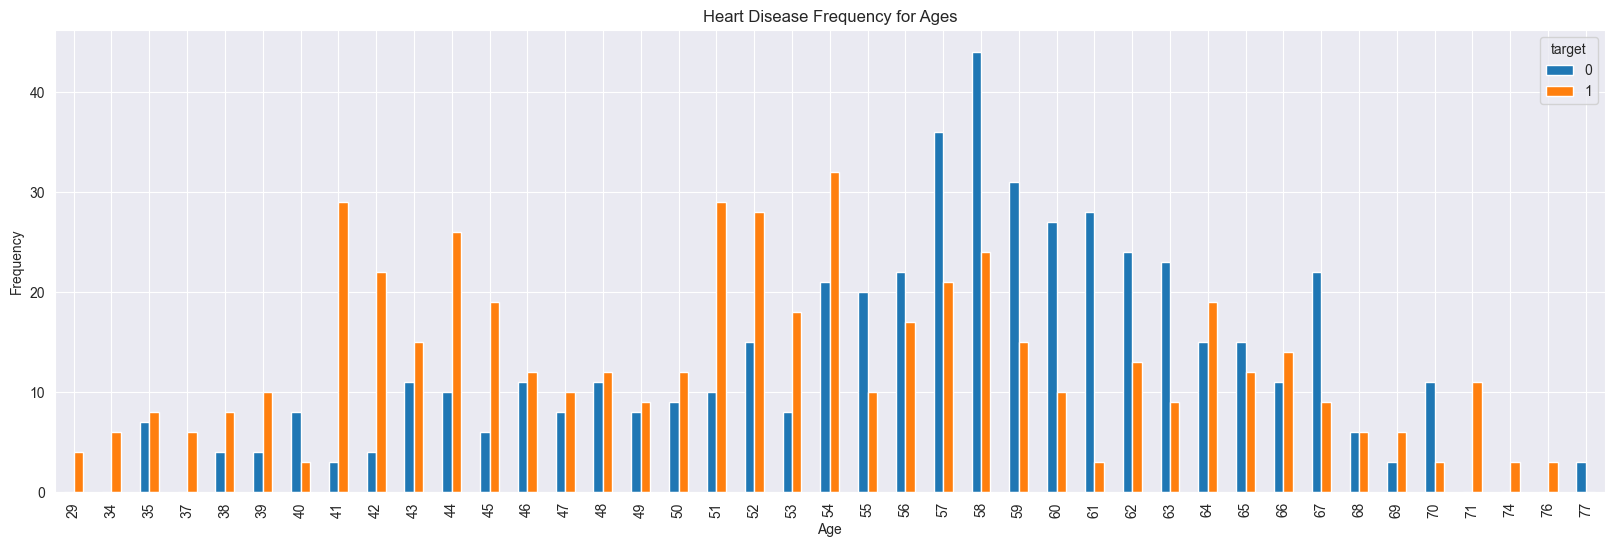

In [4]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
#plt.savefig('heartDiseaseAndAges.png')
plt.show()

<H4>It shows that peoples between age group of 41-45 and 51-60 have highly chance of having Heart Disease.

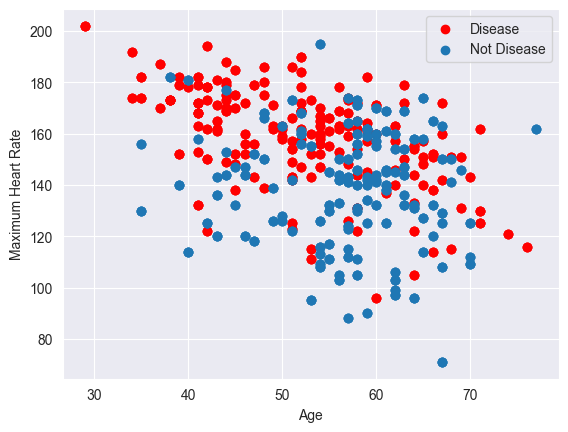

In [5]:
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="red" )
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

<h4>This scatter plot shows our dataset is evenly distributed. So, it's not biased.

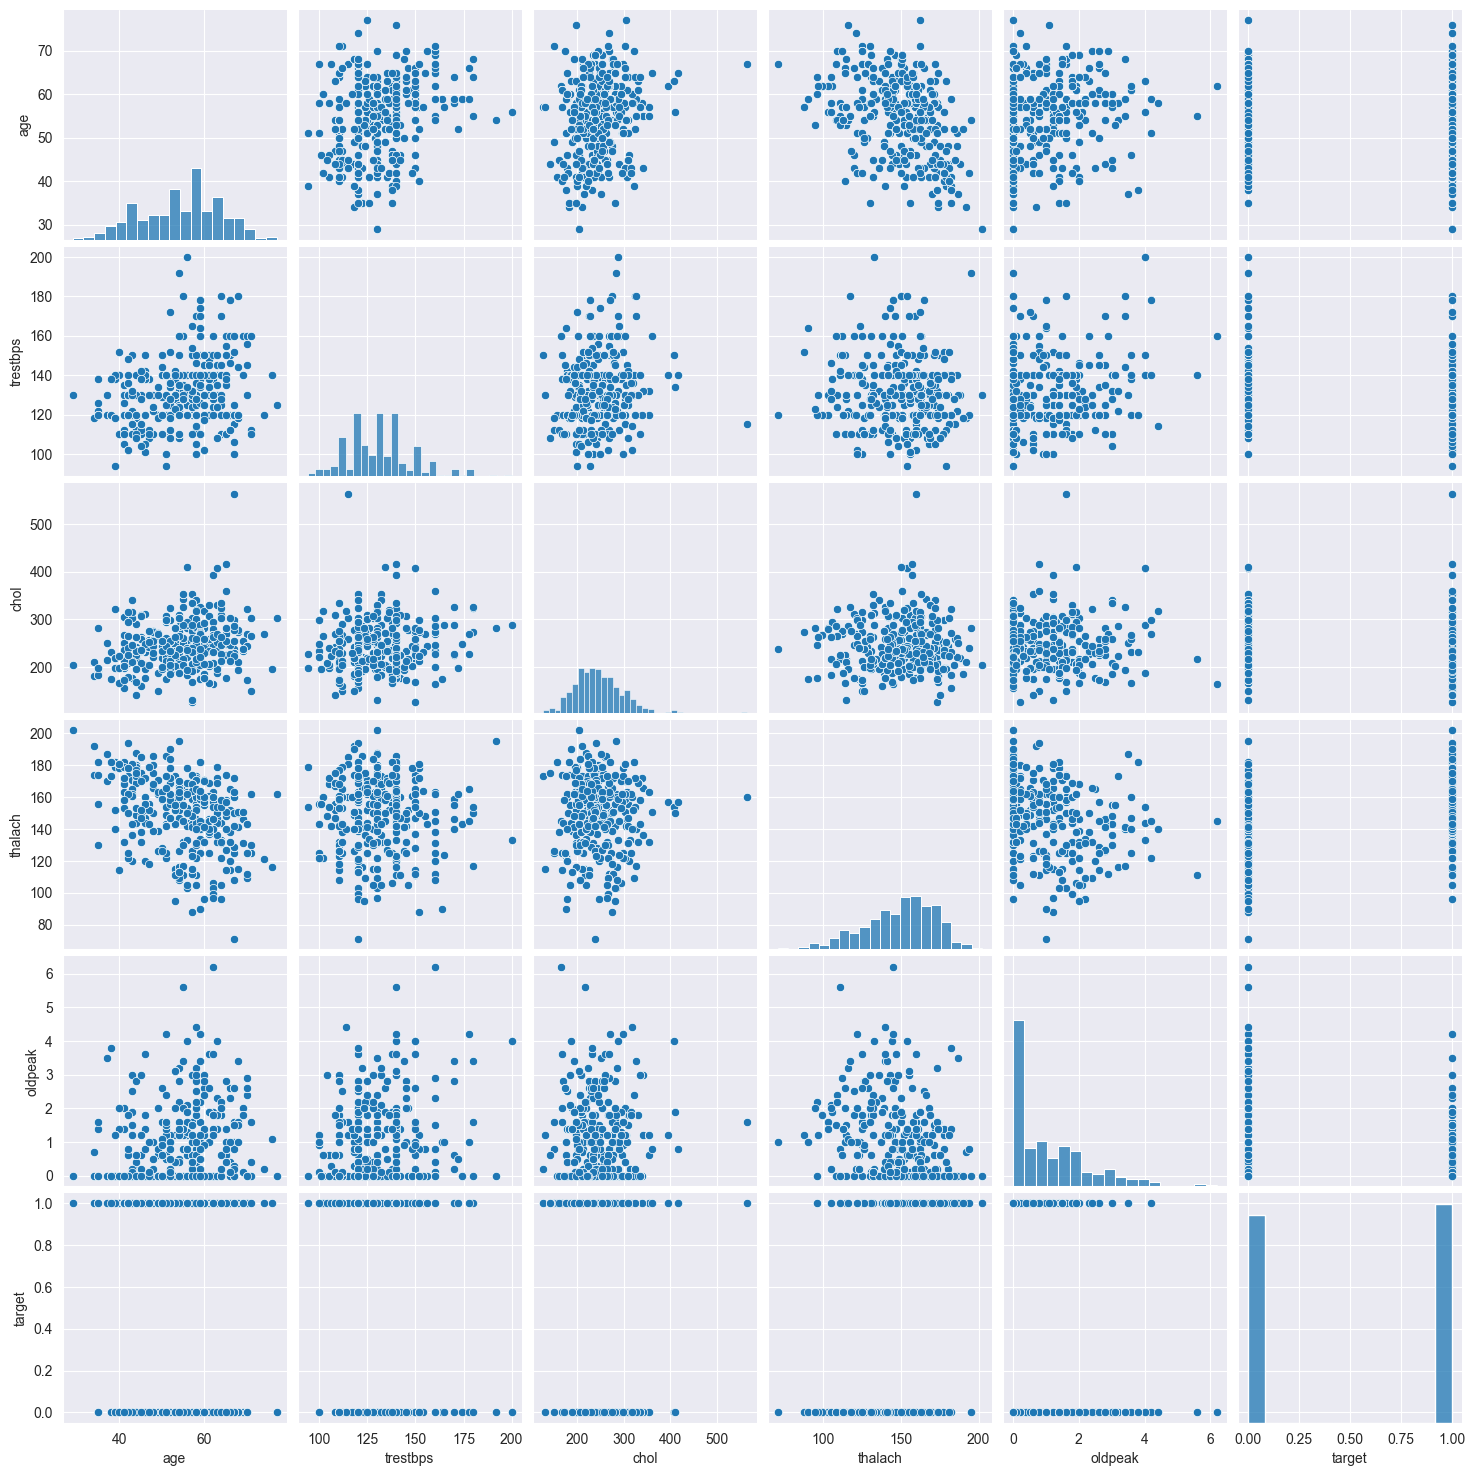

In [6]:
num_var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target' ]
sns.pairplot(data[num_var], kind='scatter', diag_kind='hist')
plt.show()

<h4>Here, we can analyze the relation between different features.

In [7]:
#ROC Plot
def plot_roc(y_test, probs):
    fpr, tpr, threshold = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    print("ROC AUC=$0.2f"%roc_auc)
    plt.plot(fpr, tpr, label = 'AUC=%0.2f'%roc_auc,color='darkorange')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

<h3>Extracting the features into dependent and un-dependent variables.

In [8]:
x=data.drop('target',axis=1)
y=data.iloc[:,-1]

In [9]:
# Independent Features
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [10]:
# Dependent Features
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

<h4>Splitting the dataset for <b>Training</b> and <b>Testing</b>. 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

<h3>1. Logistic Regression

Logistic Regression Accuracy: 86.34%
[[ 77  21]
 [  7 100]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205

ROC AUC=$0.2f


c:\Users\gyand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


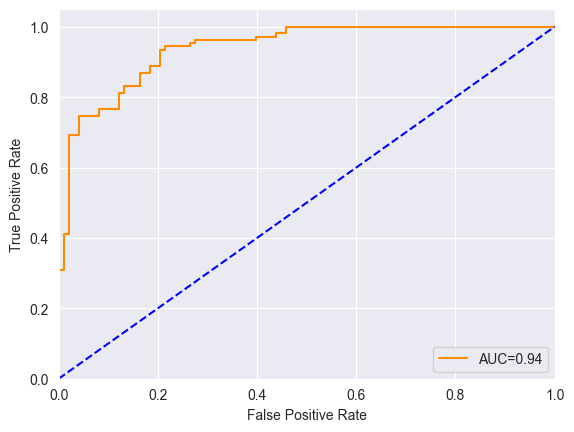

In [12]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

print("Logistic Regression Accuracy: {:.2f}%".format(lr_model.score(X_test, y_test) * 100))
pred = lr_model.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test, pred))
probs_lr=lr_model.predict_proba(X_test)[:,1]


plot_roc(y_test,probs_lr)

<h4>Logistic Regression model show the accuracy of <b>86.34%

<h3>2. Support Vector Machine(SVM)

Support Vector Machine Accuracy: 74.63%
[[66 32]
 [20 87]]
              precision    recall  f1-score   support

           0       0.77      0.67      0.72        98
           1       0.73      0.81      0.77       107

    accuracy                           0.75       205
   macro avg       0.75      0.74      0.74       205
weighted avg       0.75      0.75      0.74       205

ROC AUC=$0.2f


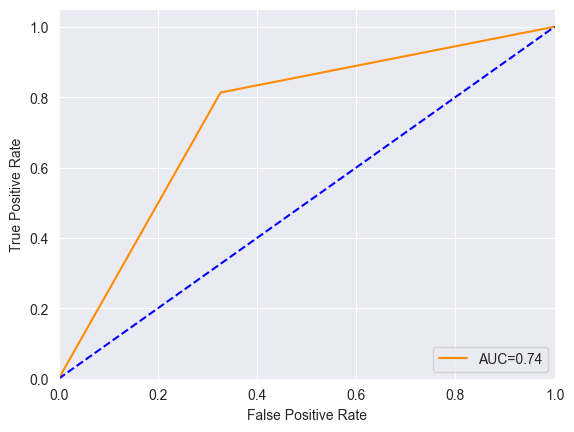

In [13]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

print("Support Vector Machine Accuracy: {:.2f}%".format(svm_model.score(X_test, y_test) * 100))
pred = svm_model.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test, pred))


plot_roc(y_test,pred)

<h4>SVM model show the accuracy of <b>74.63%

<h3>3. Random Forest

In [14]:
#rf_model = RandomForestClassifier()    #by default it takes 100 trees
rf_model = RandomForestClassifier(n_estimators=20, random_state=0)  
rf_model.fit(X_train,y_train)
val= rf_model.fit(X_train,y_train)

print("Random Forest Accuracy: {:.2f}%".format(rf_model.score(X_test, y_test) * 100))
pred = rf_model.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test, pred))
probs_rf=rf_model.predict_proba(X_test)[:,1]

Random Forest Accuracy: 100.00%
[[ 98   0]
 [  0 107]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       107

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



<h4>Randon Forest showing the accuracy of <b>100%</b>. But this seems odd thus i'll try <b>Ensembles Learning</b> to create a efficient and legit model by combining all models together.

[Text(0.4260752688172043, 0.9545454545454546, 'x[7] <= 150.5\ngini = 0.499\nsamples = 509\nvalue = [392, 428]'),
 Text(0.20967741935483872, 0.8636363636363636, 'x[11] <= 0.5\ngini = 0.435\nsamples = 240\nvalue = [256, 120]'),
 Text(0.0967741935483871, 0.7727272727272727, 'x[9] <= 0.7\ngini = 0.5\nsamples = 104\nvalue = [87, 83]'),
 Text(0.03225806451612903, 0.6818181818181818, 'x[0] <= 55.5\ngini = 0.316\nsamples = 38\nvalue = [12, 49]'),
 Text(0.021505376344086023, 0.5909090909090909, 'gini = 0.0\nsamples = 20\nvalue = [0, 30]'),
 Text(0.043010752688172046, 0.5909090909090909, 'x[9] <= 0.35\ngini = 0.475\nsamples = 18\nvalue = [12, 19]'),
 Text(0.03225806451612903, 0.5, 'x[2] <= 0.5\ngini = 0.499\nsamples = 13\nvalue = [12, 13]'),
 Text(0.021505376344086023, 0.4090909090909091, 'gini = 0.0\nsamples = 3\nvalue = [5, 0]'),
 Text(0.043010752688172046, 0.4090909090909091, 'x[5] <= 0.5\ngini = 0.455\nsamples = 10\nvalue = [7, 13]'),
 Text(0.03225806451612903, 0.3181818181818182, 'x[3] <= 1

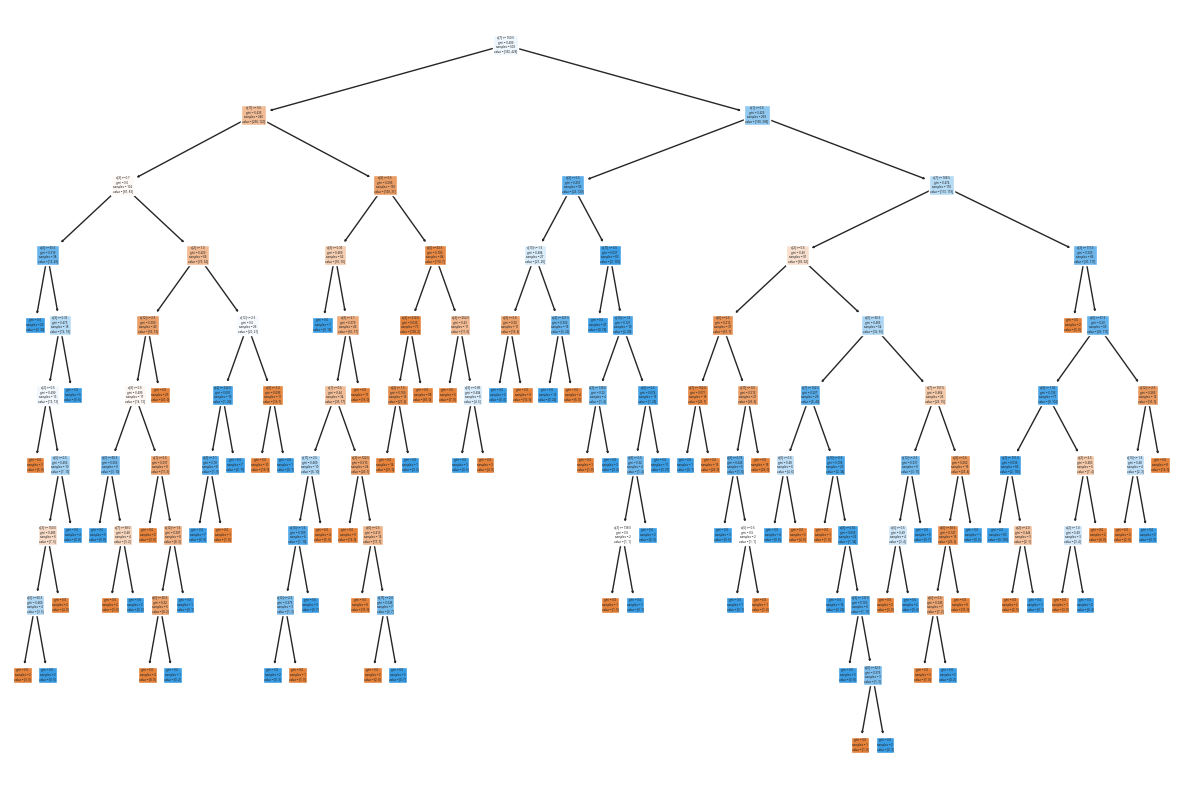

In [15]:
len(rf_model.estimators_)
plt.figure(figsize=(15,10))
tree.plot_tree(rf_model.estimators_[1], filled=True)

Text(8.222222222222223, 0.5, 'Truth')

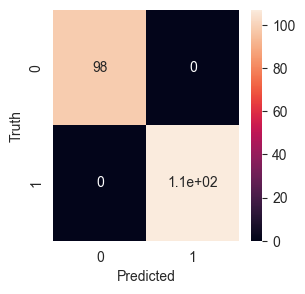

In [16]:
confu_mat = confusion_matrix(y_test,pred)
confu_mat
plt.figure(figsize=(3,3))
sns.heatmap(confu_mat, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")


ROC AUC=$0.2f


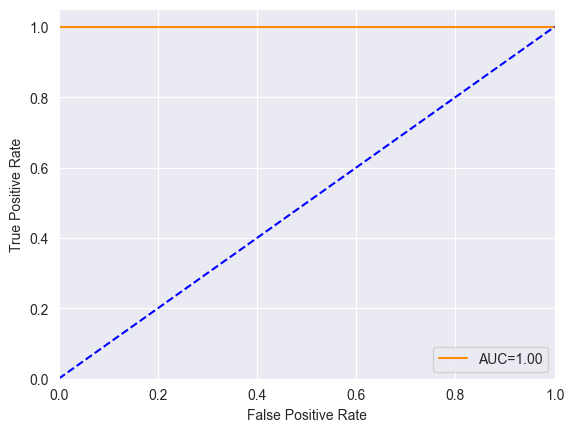

<function matplotlib.pyplot.legend(*args, **kwargs)>

In [17]:
plot_roc(y_test,probs_rf)
plt.legend

<h3>4. Ensembles Learning

In [18]:
# Create base models
model1 = RandomForestClassifier(random_state=42)
model2 = GradientBoostingClassifier(random_state=42)

<h4>First, i'll try <b>SVM</b> with <b>RandomForestClassifier</b> and <b>GradientBoostingClassifier</b>.

Ensemble Model Accuracy: 0.9951219512195122
[[ 97   1]
 [  0 107]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        98
           1       0.99      1.00      1.00       107

    accuracy                           1.00       205
   macro avg       1.00      0.99      1.00       205
weighted avg       1.00      1.00      1.00       205

ROC AUC=$0.2f


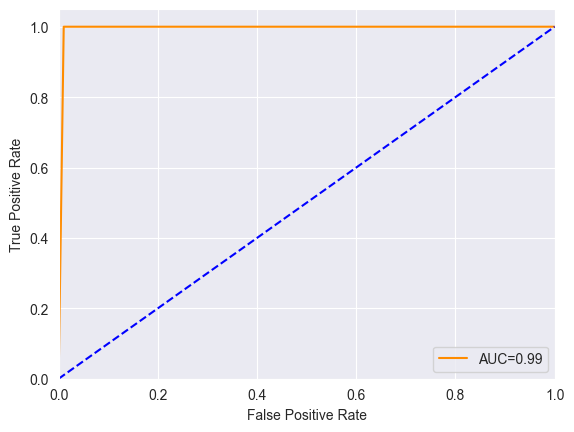

In [19]:
svm_ensem = VotingClassifier(estimators=[('svm', svm_model), ('rf', model1), ('gb', model2)], voting='hard')
svm_ensem.fit(X_train, y_train)
svm_ensem_predict = svm_ensem.predict(X_test)

# Evaluate the ensemble model
accurate = accuracy_score(y_test, svm_ensem_predict)
print(f'Ensemble Model Accuracy: {accurate}')

print(confusion_matrix(y_test, svm_ensem_predict))
print(classification_report(y_test, svm_ensem_predict))

plot_roc(y_test, svm_ensem_predict)

<h4>SVM with RFC and GBC shows the accuraccy of <b>99%</b>.

<h4>Now, let's see <b>LR</b> with <b>RandomForestClassifier</b> and <b>GradientBoostingClassifier</b>.

c:\Users\gyand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ensemble Model Accuracy: 0.9902439024390244
[[ 96   2]
 [  0 107]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        98
           1       0.98      1.00      0.99       107

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

ROC AUC=$0.2f


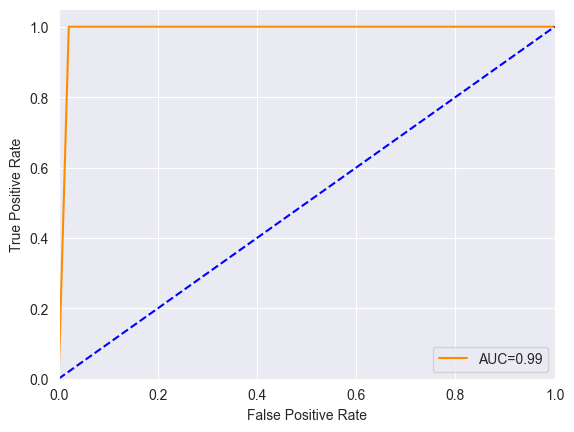

In [20]:
lr_ensem = VotingClassifier(estimators=[('lr', lr_model), ('rf', model1), ('gb', model2)], voting='hard')

lr_ensem.fit(X_train, y_train)
lr_ensem_predict = lr_ensem.predict(X_test)
# Evaluate the ensemble model
accurate = accuracy_score(y_test, lr_ensem_predict)
print(f'Ensemble Model Accuracy: {accurate}')

print(confusion_matrix(y_test, lr_ensem_predict))
print(classification_report(y_test, lr_ensem_predict))

plot_roc(y_test, lr_ensem_predict)

<h4>LR with RFC and GBC also shows the accuraccy of <b>99%</b>.

But, SVM shows better accuracy then LR Ensembles Model by just slightly having upper hand in accuracy.So, let's use SVM Ensembles Model for detecting Heart Disease in a person.

<h3>Predicting whether the person has <b>Heart Disease</b> or not by providing it's data to our <b>SVM Ensembled Model</b>.

In [ ]:
person1 = svm_ensem.predict([[29,1,1,130,204,0,0,202,0,0,2,0,2]])
person2 = svm_ensem.predict([[67,0,0,106,223,0,1,142,0,0.3,2,2,2]])

In [22]:
if(int(person1) == 1):
    print("Person has heart disease.")
else:
    print("Person has no heart disease.")


Person has heart disease.


<h1>Result</h1>
In this process, we provide an overview of the system for predicting heart disease using several classifier algorithms. We used different machine learning algorithms such as Linear Regression (LR), Support Vector Machine (SVM), Random Forest (RF) and Ensembled learning techniques used to predict heart disease. The objective was to build a robust and accurate predictive model that could assist healthcare professionals in identifying individuals at risk of heart disease, allowing for early intervention and improved patient outcomes.